In [24]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import glob
import os

In [26]:
main_folder = r"C:\Users\alexa\eclipse-workspace\GWOPSOAlgorithmMain"
df = []
csv_filenames = []
dfComplete = {}
file_sizes = 25896
outputs = 37714
iterations = range(1, 21)
vmCounts = [50]
cloudletCounts = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
algorithms = ["GWO", "PSO", "GWO-PSO", "DGWO"]

MSresults = {}
EXEresults = {}
RESresults = {}
transmisResults = {}


for algorithm in algorithms:
    for cloudlet_count in cloudletCounts:
            for vm_count in vmCounts:
                MSTotalValues = []
                EXETotalValues = []
                RESTotalValues = []
                    
                for iteration in iterations:
                    filename = f"CloudletInfo - {algorithm} -  File Size -  {file_sizes} - Output - {outputs} Number of Virual Machines - {vm_count} Number of Cloudlets - {cloudlet_count} Iteration - {iteration}.csv"
                    file_path = os.path.join(main_folder, filename)
                        
                    if os.path.exists(file_path):
                        df = pd.read_csv(file_path) 
                        csv_filenames.append(filename)
                        dfComplete[filename] = df
                        MSRowValue = df.iloc[-1, 10]
                        MSTotalValues.append(MSRowValue)
                        EXERowValue = df.iloc[-1, 12]
                        EXETotalValues.append(EXERowValue)
                        RESRowValue = df.iloc[-1, 11]
                        RESTotalValues.append(RESRowValue)

                        
                    MSAverageValue = np.mean(MSTotalValues)
                    MSkey = (algorithm, file_sizes, outputs, vm_count, cloudlet_count)
                    MSresults[MSkey] = MSAverageValue

                    EXEAverageValue = np.mean(EXETotalValues)
                    EXEkey = (algorithm, file_sizes, outputs, vm_count, cloudlet_count)
                    EXEresults[EXEkey] = EXEAverageValue

                    RESAverageValue = np.mean(RESTotalValues)
                    RESkey = (algorithm, file_sizes, outputs, vm_count, cloudlet_count)
                    RESresults[RESkey] = RESAverageValue

In [27]:
print(file_sizes)

25896


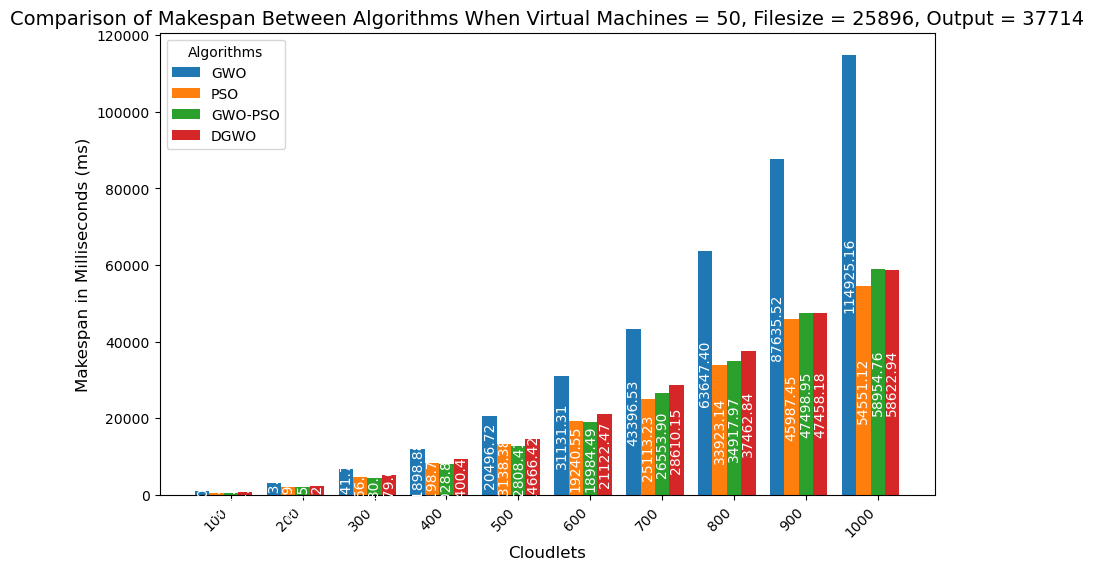

In [28]:
algorithm_results = {algo: [] for algo in algorithms}

for algo in algorithms:
    for cloudlet in cloudletCounts:
        key = (algo, file_sizes, outputs, 50, cloudlet)  
        if key in MSresults:
            algorithm_results[algo].append(MSresults[key])
        else:
            algorithm_results[algo].append(None)  

filtered_algorithm_results = {algo: [] for algo in algorithms}
filtered_cloudletCounts = []

for i, cloudlet in enumerate(cloudletCounts):
    if any(algorithm_results[algo][i] is not None for algo in algorithms):  
        filtered_cloudletCounts.append(cloudlet)  
        for algo in algorithms:
            filtered_algorithm_results[algo].append(algorithm_results[algo][i])

bar_width = 0.8 / len(algorithms)
index = np.arange(len(filtered_cloudletCounts))

plt.figure(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    bars = plt.bar(index + i * bar_width, filtered_algorithm_results[algo], bar_width, label=algo)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', fontsize=10, color='white', rotation=90)     

plt.xlabel("Cloudlets", fontsize=12)
plt.ylabel("Makespan in Milliseconds (ms)", fontsize=12)
plt.title("Comparison of Makespan Between Algorithms When Virtual Machines = 50, Filesize = 25896, Output = 37714", fontsize=14)
plt.xticks(index + (len(algorithms) * bar_width) / 2, filtered_cloudletCounts, rotation=45, ha='right')
plt.legend(title='Algorithms')

plt.savefig('Comparison of Makespan Between Algorithms When Virtual Machines = 50 - Filesize = 25896, Output = 37714', dpi=300, bbox_inches='tight')
plt.show()

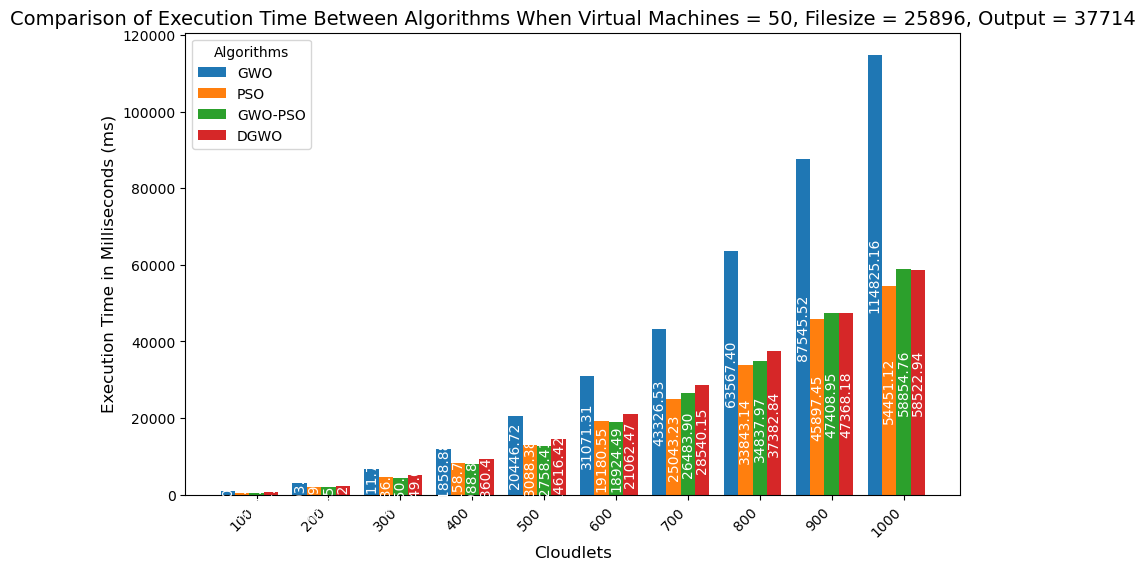

In [38]:
algorithm_results = {algo: [] for algo in algorithms}

for algo in algorithms:
    for cloudlet in cloudletCounts:
        key = (algo, 25896, 37714, 50, cloudlet)  
        if key in EXEresults:
            algorithm_results[algo].append(EXEresults[key])
        else:
            algorithm_results[algo].append(None)  

filtered_algorithm_results = {algo: [] for algo in algorithms}
filtered_cloudletCounts = []

for i, cloudlet in enumerate(cloudletCounts):
    if any(algorithm_results[algo][i] is not None for algo in algorithms):  
        filtered_cloudletCounts.append(cloudlet)  
        for algo in algorithms:
            filtered_algorithm_results[algo].append(algorithm_results[algo][i])

 
index = np.arange(len(filtered_cloudletCounts))

plt.figure(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    bars = plt.bar(index + i * bar_width, filtered_algorithm_results[algo], bar_width, label=algo)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', fontsize=10, color='white', rotation=90) 

plt.xlabel("Cloudlets", fontsize=12)
plt.ylabel("Execution Time in Milliseconds (ms)", fontsize=12)
plt.title("Comparison of Execution Time Between Algorithms When Virtual Machines = 50, Filesize = 25896, Output = 37714", fontsize=14)
plt.xticks(index + bar_width * 2, filtered_cloudletCounts, rotation=45, ha='right')  
plt.legend(title='Algorithms')

plt.savefig('Comparison of Execution Time Between Algorithms When Virtual Machines = 50 - Filesize = 25896, Output = 37714', dpi=300, bbox_inches='tight')
plt.show()

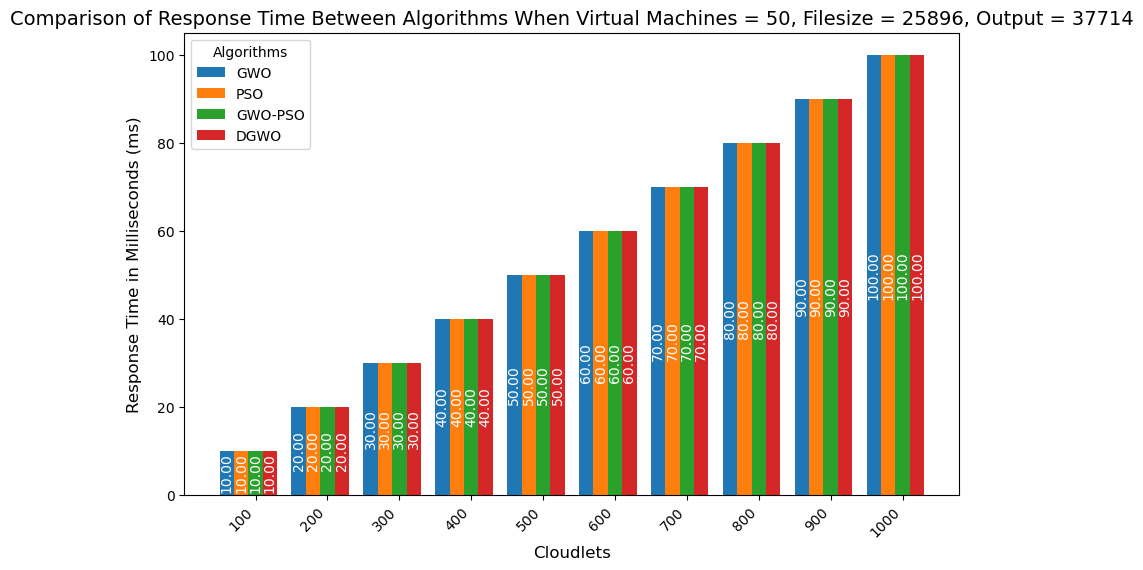

In [40]:
algorithm_results = {algo: [] for algo in algorithms}

for algo in algorithms:
    for cloudlet in cloudletCounts:
        key = (algo, 25896, 37714, 50, cloudlet)  
        if key in RESresults:
            algorithm_results[algo].append(RESresults[key])
        else:
            algorithm_results[algo].append(None)  

filtered_algorithm_results = {algo: [] for algo in algorithms}
filtered_cloudletCounts = []

for i, cloudlet in enumerate(cloudletCounts):
    if any(algorithm_results[algo][i] is not None for algo in algorithms):  
        filtered_cloudletCounts.append(cloudlet)  
        for algo in algorithms:
            filtered_algorithm_results[algo].append(algorithm_results[algo][i])

 
index = np.arange(len(filtered_cloudletCounts))

plt.figure(figsize=(10, 6))

for i, algo in enumerate(algorithms):
    bars = plt.bar(index + i * bar_width, filtered_algorithm_results[algo], bar_width, label=algo)
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.2f}', ha='center', va='center', fontsize=10, color='white', rotation=90) 

plt.xlabel("Cloudlets", fontsize=12)
plt.ylabel("Response Time in Milliseconds (ms)", fontsize=12)
plt.title("Comparison of Response Time Between Algorithms When Virtual Machines = 50, Filesize = 25896, Output = 37714", fontsize=14)
plt.xticks(index + bar_width * 2, filtered_cloudletCounts, rotation=45, ha='right')  
plt.legend(title='Algorithms')

plt.savefig('Comparison of Response Time Between Algorithms When Virtual Machines = 50 -  Filesize = 25896, Output = 37714', dpi=300, bbox_inches='tight')
plt.show()